# ENG 10: HW 3 (Signals)
This homework focuses on how to create sound waves and modify them.

In [1]:
# ensure code is compatible with both Python 2.7 and 3.5
from __future__ import print_function, division

# load required packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# load and play audio files directly in the notebook
from IPython.display import Audio

# load .wav files as numpy arrays
from scipy.io import wavfile

# functions to filter the audio signals
from scipy.signal import butter, lfilter

<hr style="border: 1.5px solid#6caaff;" />

## 0. Data structure of sound wave file

To check that we have all the packages loaded properly, we'll first play a short sound clip from the following url:

http://www.talkingwav.com/wp-content/uploads/2017/10/mario_01.wav

In [2]:
# let's play a short sound clip from a URL
Audio("http://www.talkingwav.com/wp-content/uploads/2017/10/mario_01.wav")

There are four sound files in wav format in the homework zip file.
Let's load a sound wave file from your laptop:
- sound1.wav
- sound2.wav
- sound3.wav
- sound4.wav

Pick one of them in the code cell below and let's take a look at its data structure.

In [3]:
# load the audio file as numpy arrays:
# - rate: the sampling frequency (Hz)
# - data: the audio signal as an array
rate, data = wavfile.read('sound2.wav')

# check how the sound data looks
print(data)

# check its data shape
print("Data shape", data.shape)

print("Number of samples:", data.size)

# check its data data type
print(type(data))

# check the sample rate and the data type or sample rate
print("Sampling frequency [Hz]:", rate)
print(type(rate))

# calculate its play time
print("Length of song",len(data)/rate, 'seconds')

# play a short sound wav. file on your laptop
Audio("sound4.wav")

[ 1  1  1 ... -2 12 -3]
Data shape (249835,)
Number of samples: 249835
<class 'numpy.ndarray'>
Sampling frequency [Hz]: 16000
<class 'int'>
Length of song 15.6146875 seconds


<hr style="border: 1.5px solid#6caaff;" />

## 1. Creation, synthesis, and noise-canceling of sound signal

In these problems, we are going to create our own signal with sine or cosine functions and synthesize a new signal.
Then, we will cover how to cancel noise from an original sound signal.

### 1. 1) Creation of sound signal

We will create a signal with a sine or a cosine function and then plot and play it.
Before doing that, let's define sampling frequency, length of the sound, and a time vector.

In [4]:
# sampling frequency (in Hz, choose a value above 5000 Hz)
fs = 8000

# duration of sample [seconds]
T = 1

# time vector [seconds]
t = np.linspace(0, T, int(T * fs))

In the code cell below, we will create a customized sound signal.

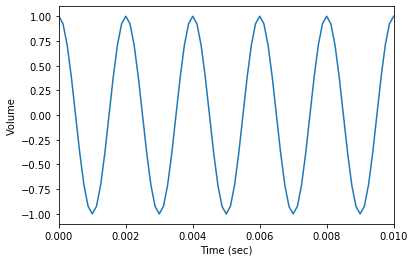

In [5]:
# pure sine wave at your desired frequency in Hz (try values between 100 and 10000 Hz)
pitchfrequency = 500

# create your sine function: cos(2*pi*f*t)
my_sound = np.cos(2 * np.pi * pitchfrequency * t)

#plot the raw data
plt.plot(t, my_sound)

# add labels
plt.xlabel("Time (sec)")
plt.ylabel("Volume")

# Set the limit in an axis
plt.xlim([0, 0.01])

plt.show()

# load the NumPy ndarray from the defined function and play it
Audio(data=my_sound, rate=fs)

<hr style="border: 0.5px solid#C4C4C4;" />

### 1.2) Creation of a noise

In the following code cell, we will create another sound signal in the same way and consider it as a noise.

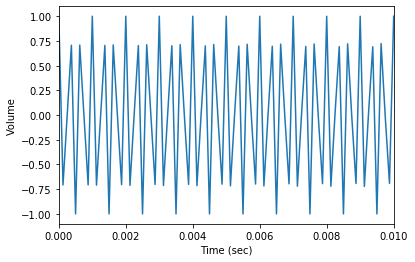

In [6]:
# Set your desired frequency in Hz (try values between 100 and 10000 Hz)
noise_pitchfrequency = 3000

# create an any signal
noise = np.cos(2 * np.pi * noise_pitchfrequency * t)

#plot the noise
plt.plot(t, noise)

# add labels
plt.xlabel("Time (sec)")
plt.ylabel("Volume")

# Set the limit in an axis
plt.xlim([0, 0.01])

plt.show()

# load the data and play the noise
Audio(data=noise, rate=noise_pitchfrequency)

<hr style="border: 0.5px solid#C4C4C4;" />

### 1.3) Synthesis of an original signal and a noise

Now, we will synthesize an original signal and a noise.

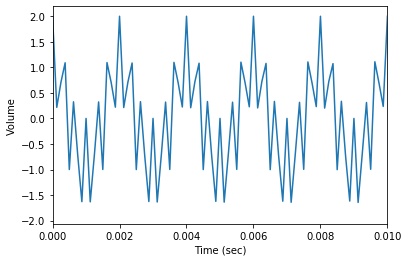

In [8]:
# Synthesize the original signal and a noise
synthesized_sound = my_sound + noise

#plot the synthesized result
plt.plot(t, synthesized_sound)

# add labels
plt.xlabel("Time (sec)")
plt.ylabel("Volume")

# Set the limit in an axis
plt.xlim([0, 0.01])

plt.show()

# load the synthesized data and play it
Audio(data=noise, rate=pitchfrequency)

<hr style="border: 0.5px solid#C4C4C4;" />

### 1.4) Noise-canceling

We are able to cancel the noise signal simply by adding the negative values of noise signal to the syntesized signal.

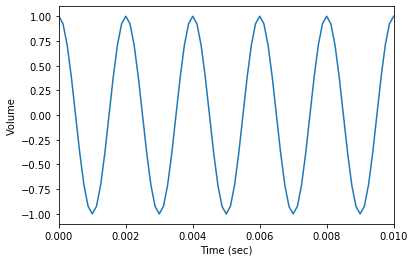

In [10]:
# Let's cancel the noise
noise_canceled_sound = synthesized_sound - noise

#plot the raw data
plt.plot(t, noise_canceled_sound)

# add labels
plt.xlabel("Time (sec)")
plt.ylabel("Volume")

# Set the limit in an axis
plt.xlim([0, 0.01])

plt.show()

# load the NumPy ndarray from the defined function and play it
Audio(data=noise_canceled_sound, rate=pitchfrequency)

Verify that this result is the original wave signal you intended.

<hr style="border: 1.5px solid#6caaff;" />

## 2. Playing the sound files
In this part, we will load the sound files from your laptop. Can you figure out the source of each sound clip?

*Hint*: They are all songs.

<hr style="border: 0.5px solid#C4C4C4;" />

### 2.1) Reading Sound Files
For these exercises, we will be using sample sound clips to see how the concepts from the lecture apply to "real" data.

In [11]:
# sound clip 1: 20 s long, 16 kHz frequency
Audio('sound1.wav')

In [12]:
# sound clip 2: 15 s long, 16 kHz frequency
Audio('sound2.wav')

In [13]:
# sound clip 3: 12 s long, 16 kHz frequency
Audio('sound3.wav')

In [62]:
# sound clip 4: 9 s long, 16 kHz frequency
Audio('sound4.wav')

Sources:
- **sound1.wav**: opening theme song from the Pokemon TV show
- **sound2.wav**: Lil Jon - Bend Ova ft. Tyga
- **sound3.wav**: Metallica - Enter Sandman
- **sound4.wav**: Taylor Swift - I Knew You Were Trouble Goat Edition

**Question:** From listening to these sound files, can you identify anything that they have in common? For example, are there any common instruments or sound types?

**Answer:** Similar sound types. Singing and instruments are involved.

<hr style="border: 0.5px solid#C4C4C4;" />

### 2.2) Loading the sound files
Now we've heard each of the sound clips, pick you favorite one to use in the code below (which will load the audio file as data in an array).

In [15]:
# load the audio file as numpy arrays
rate, data = wavfile.read('sound4.wav')

# check that the sound file has the correct sampling frequency
# of 16 kHz (16,000 Hz)
print("Sampling frequency [Hz]:", rate)

# check the size of the data (i.e. the number of data samples)
n_samples = len(data)
print("Number of samples:", n_samples)

# check the time length of the data in seconds
length = n_samples / rate
print("Length of the clip [s]:", length)

# check the data type of your wave file
print(type(data))

# check the dimension of your sample
print(data.shape)

# check your data
print(data)

# play back the audio (to check if it still sounds "correct")
Audio(data, rate=rate)

Sampling frequency [Hz]: 16000
Number of samples: 152555
Length of the clip [s]: 9.5346875
<class 'numpy.ndarray'>
(152555,)
[-11  13  -8 ...   1   1   1]


**Question:** What is the sampling frequency [Hz], number of samples, and length of the audio file [seconds]?

**Answer:** For ``sound4.wav``, the answers are: 16000Hz, 152555, 9.5346875s

**Question:** If my sampling frequency is 16 kHz (16,000 Hz), what is the maximum frequency I expect my audio file to contain?

*Hint*: What does the Nyquist Theorem says about the relationship between sampling frequency and maximum frequency?

**Answer:** 8000Hz

<hr style="border: 0.5px solid#C4C4C4;" />

### 2.3) Visualizing audio data1: Signal line plot
We can visualize audio data as a normal time series signal or by using a spectogram (which shows the distribution of sinusoids – each with different frequencies – that makes up the signal).

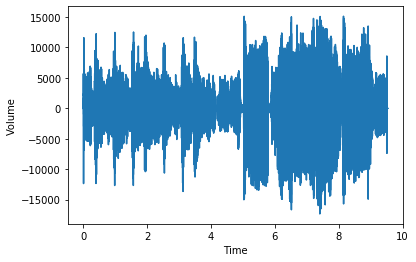

In [63]:
# create a time vector (for plotting the audio data)
n_samples = 152555
t_min = 0
t_max = n_samples / rate
time = np.linspace(t_min, t_max, n_samples)

# plot the audio signal over time
plt.plot(time, data)

# add labels
plt.xlabel('Time')
plt.ylabel('Volume')

# remove whitespace in the plot
plt.axis('tight')

plt.show()
Audio(data, rate=rate)

**Question:** What can you observe about the audio file from this line plot? For example, do the peak values correspond to something happening in the song (e.g. a song chorus)?

**Answer:** Greater peak values means that the audio is louder.

While the line plot shows us when the song is "loud", it doesn't tell us the source of the sound (e.g. a bass drop vs a singer screaming).

**Question:** How can you (a human) identify different "instruments" in a song (e.g. a bass guitar vs a singer)?

**Answer:** Multiple frequencies are associated with a sound. When they are combined they form a "source" of sound.

<hr style="border: 0.5px solid#C4C4C4;" />

### 2.4) Visualizing audio data1: Spectrogram (Nonequispaced Fast Fourier Transform, NFFT)
A spectrogram is a 2D plot that allows us to visualize the distribution of frequencies in a signal.

A link to availalbe color maps: http://matplotlib.org/examples/color/colormaps_reference.html

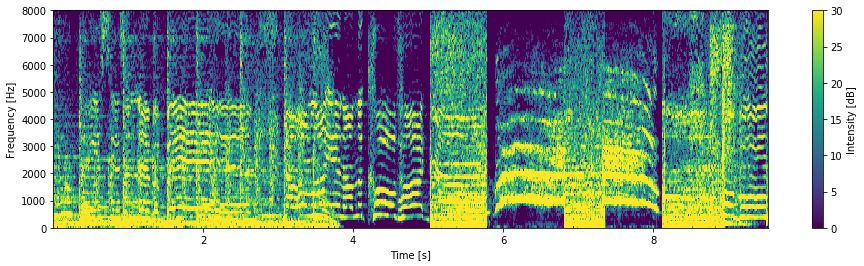

In [64]:
# figure setup
fig = plt.figure(figsize=(16, 4))

# spectrogram plot:
# - Fs = the sampling frequency [Hz] of the signal
# - cmap = colormap for the plot (e.g. Reds, viridis, cubehelix)
# - vmin, vmax = min/max values for the colorbar to show
plt.specgram(data, Fs=rate, cmap='viridis', vmin=0, vmax=30)

# add labels
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')

# add a colorbar
cbar = plt.colorbar()
cbar.set_label('Intensity [dB]')

# automatically remove extra whitespace
plt.axis('tight')

plt.show()

**Question:** Based on the spectrogram, can you observe any additional details or behavior in the audio signal (as compared to the line plot)?

**Answer:** Higher frequencies have higher intensity, probably because the audio clip is louder at high frequencies?

**Question:** Why does the spectrogram's y-axis go from 0 to 8000 Hz (i.e. 8 kHz)? 
*Hint*: The audio file has a sampling rate of 16 kHz.

**Answer:** An audio clip with a sampling rate of 16kHz can only record sounds of up to 8kHz.

<hr style="border: 1.5px solid#6caaff;" />

## 3. Filtering Signals
In this section we will try filtering the audio data to see how it changes the way it looks and sounds.

Run the code cell below to load two functions (``lowpass()`` and ``highpass()``), which we will use to filter the audio data.

### Notes
When using digital filters, we have to declare a cutoff frequency ($f_c$) which does exactly what it sounds like – it is the frequency at which we cut off our signal. We will consider two types of filters:
- A low-pass filter lets signals lower than $f_c$ pass through unimpeded, and dampens everything above it.
- A high-pass filter lets signals higher than $f_c$ pass through unimpeded, and dampens everything below it.

In both cases, the inputs for our filtering functions are: 
1. The raw data to be filtered
2. The sampling frequency of our data
3. The cutoff frequency of the filter

In [65]:
# functions to apply low-pass and high-pass filters

# the low-pass filter
def lowpass(data, fs, cutoff):
    # the nyquist frequency = 1/2 * our sampling frequency
    nyq = fs / 2
    
    # find the cutoff frequency in the digital domain
    low = cutoff / nyq
    
    # get the filter coefficients:
    # - 10 = the "order" of the filter
    #
    b, a = butter(10, low, btype='low')     
    
    # apply the filter in time domain (Convolution)
    filtered_data = lfilter(b, a, data)
    
    # output the filtered data
    return filtered_data


# the high-pass filter
#
# NOTE: the same code as above, except we filter data 
# below our cutoff frequency
#
def highpass(data, fs, cutoff):          
    nyq = fs / 2
    high = cutoff / nyq
    b, a = butter(10, high, btype='high')
    filtered_data = lfilter(b, a, data)
    return filtered_data

<hr style="border: 0.5px solid#C4C4C4;" />

### 3.1) Filter the signal and listen to the result
Now we will test out these two filters on one of our audio files (your choice). First, the low-pass filter:

In [68]:
# load the audio file you want to apply low-pass filter on
rate, data = wavfile.read('sound4.wav')

# select the cutoff frequency [Hz]
cutoff = 3000

# apply the low-pass filter
lowpass_data = lowpass(data, rate, cutoff)

# play back the filtered audio
Audio(data=lowpass_data, rate=rate)

Next, the high-pass filter:

In [67]:
# load the audio file you want to apply low-pass filter on
rate, data = wavfile.read('sound4.wav')

# select the cutoff frequency [Hz]
cutoff = 5000

# apply the low-pass filter
highpass_data = highpass(data, rate, cutoff)

# play back the filtered audio
Audio(data=highpass_data, rate=rate)

In [55]:
# play the original sound clip and compare it with the filtered result
Audio("sound4.wav", rate=rate)

**Question:** What effect(s) did the filters have on how the audio sounds?

*Hint:* Did it sound like the filtered audio was missing something?

**Answer:** Some of the higher or lower frequencies are missing, making the sound seemed high pitched or low pitched.

<hr style="border: 0.5px solid#C4C4C4;" />

### 3.2) Visualizing the filtered audio1: Line Plot
Although the changes may be obvious when listening to the audio, not all filtering effects can be discerned from listening to a signal. Instead, we can use line plots and spectrograms to visualize the changes.

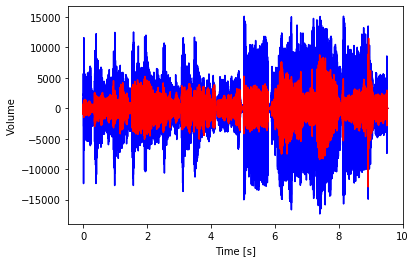

In [58]:
# create a time vector (for plotting the audio data)
n_samples = 152555
t_min = 0
t_max = n_samples / rate
time = np.linspace(t_min, t_max, n_samples)

# plot the original audio signal
plt.plot(time, data, color='blue')

# plot the filtered data
plt.plot(time, highpass_data, color='red')

# add labels
plt.xlabel('Time [s]')
plt.ylabel('Volume')

# remove empty whitespace from the figure
plt.axis('tight')

plt.show()

**Question:** Based on the line plot, how did the filters effect the audio signal?

**Answer:** Decreased the volume of the audio clip.

<hr style="border: 0.5px solid#C4C4C4;" />

### 3.3) Visualizing the filtered audio1: Spectrogram (NFFT)

Let's take the visualizations one step further by comparing the spectrograms of 1) the original signal, 2) the signal after the low-pass signal, and 3) the signal after the high-pass filter. Run the code below and then answer the questions.

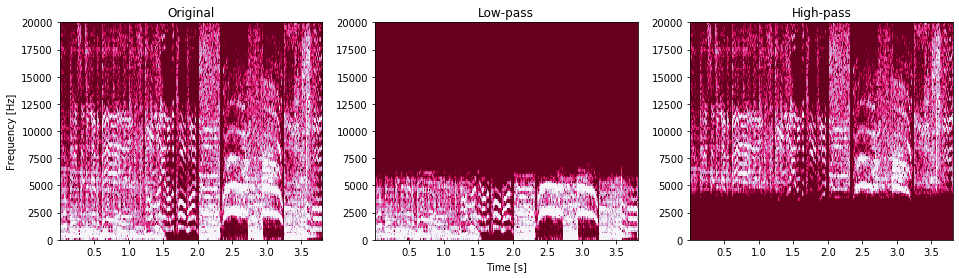

In [60]:
# figure setup
fig, [ax_left, ax_center, ax_right] = plt.subplots(1, 3, figsize=(16, 4))

# use variables to configure all the subplots to use the same colors/colorbar
vmin = 0
vmax = 30
cmap = 'PuRd_r'   # available colormaps: http://matplotlib.org/examples/color/colormaps_reference.html

# left subplot: the original signal
ax_left.specgram(data, Fs=40000, cmap=cmap, vmin=vmin, vmax=vmax)

# center subplot: the low-pass filtered signal
ax_center.specgram(lowpass_data, Fs=40000, cmap=cmap, vmin=vmin, vmax=vmax)

# right subplot: the high-pass filtered signal
ax_right.specgram(highpass_data, Fs=40000, cmap=cmap, vmin=vmin, vmax=vmax)


# add titles to the subplots
ax_left.set_title('Original')
ax_center.set_title('Low-pass')
ax_right.set_title('High-pass')

# add axis labels to the plot
ax_center.set_xlabel('Time [s]')
ax_left.set_ylabel('Frequency [Hz]')

# remove whitespace from the subplots
ax_left.axis('tight')
ax_center.axis('tight')
ax_right.axis('tight')

plt.show()

**Question:** Based on the spectrogram plots, what effect(s) do the filters have on the audio signal? Do the results agree with the theory of low-pass and high-pass filters (i.e. did the filters remove the "correct" frequencies)?

**Answer:** Frequencies are filled out if they are above/below the cutoff frequency.

**Question:** If you look closely at the spectrograms for the two filtered signals, you may notice that the signals still contain some frequencies above or below the cutoff frequency. Why is that?

*Hint*: We are dealing with "real-world" signals and filters using computers. Is anything ever "perfect" in the "real-world"?

**Answer:** Some frequencies cannot be cut off because computers may have errors converting between analog and digital signals.

## 4.  Submission
Once you have completed all the code sections and answered the questions, you will submit the HW via TritonEd:
1. rename your notebook to include your name (e.g. ``eng10_hw3_firstname_lastname``)
2. save your notebook (File >> Save and Checkpoint)
3. log into TritonEd (tritoned.ucsd.edu)
4. submit your file for HW 3 (e.g. ``eng10_hw3_firstname_lastname.ipynb``)

**NOTE**: homework are due 1 week after being assigned (before 3:00pm) and no late submissions will be accepted.